# Coding Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to import the utils to this, we convert utils and networks to python.

In [ ]:
!jupyter nbconvert --to python '/content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb'
%run '/content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb'
!jupyter nbconvert --to python '/content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb'
%run '/content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE1512/ProjectB/networks.ipynb to python
[NbConvertApp] Writing 19903 bytes to /content/drive/MyDrive/ECE1512/ProjectB/networks.py
[NbConvertApp] Converting notebook /content/drive/MyDrive/ECE1512/ProjectB/utils.ipynb to python
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('errorDetails' was unexpected)

Failed validating 'additionalProperties' in error:

On instance['cells'][0]['outputs'][0]:
{'ename': 'ModuleNotFoundError',
 'errorDetails': {'actions': [{'action': 'open_url',
                               'actionText': 'Open Examples',
                               'url': '/notebooks/snippets/importing_libraries.ipynb'}]},
 'evalue': 'ignored',
 'output_type': 'error',
 'traceback': ['\x1b---------------------------------------------------------...',
               '\x1bModuleNotFoundError\x1b                       '
               'Traceback (...',
               '\x1b<ipython-inpu

<ipython-input-3-d4a23aa8b8f3>:9: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate as scipyrotate


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import tqdm
import os
import copy
import time
from torchvision.utils import save_image
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/content/drive/MyDrive/ECE1512/ProjectB')
import utils
import networks


# MNIST Dataset Part





### Load Data Part


In [ ]:
mnist_dataset = 'MNIST'
mnist_data_path = './mnist_data'
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = utils.get_dataset(mnist_dataset, mnist_data_path)


100%|██████████| 9912422/9912422 [00:00<00:00, 95486129.76it/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23340210.76it/s]


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36061400.23it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3491665.83it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
mnist_train_loader = DataLoader(dst_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(dst_test, batch_size=64, shuffle=False)

# Part2

citation:
[1] Bo Zhao, Konda Reddy Mopuri, and Hakan Bilen. Dataset condensation with gradient matching.ICLR, 1(2):3, 2021. https://arxiv.org/abs/2006.05929

code citation:
VICO-UoE. (2022). DatasetCondensation [Code]. GitHub. https://github.com/VICO-UoE/DatasetCondensation


## Part 2(a)


Model/Device Setup

In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.model = 'ConvNet'
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = ipc
    self.Iteration = 10 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 2  #need be 20 as final test
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'

    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']

args = argument(device, 10)




FLOP Calculate





In [ ]:
len(dst_test)

10000

 answer: the FLOP for 10000 images in test set

In [ ]:
from fvcore.nn import FlopCountAnalysis
MNIST_dataset = 'MNIST'
MNIST_data_path = './MNISTdata'
MNIST_channel, MNIST_im_size, MNIST_num_classes, MNIST_class_names, MNIST_mean, MNIST_std, MNIST_dst_train, MNIST_dst_test, MNIST_testloader = get_dataset(MNIST_dataset, MNIST_data_path)
MNIST_trainloader = torch.utils.data.DataLoader(MNIST_dst_train, batch_size=8, shuffle=True, num_workers=0)
model = get_network('ConvNet', MNIST_channel, MNIST_num_classes, MNIST_im_size).to(device) # get a random model
sythetic_img_all = torch.ones((100,1,28,28)).to(device)
flops_syn = FlopCountAnalysis(model, sythetic_img_all)
print('The FLOPs for 10000 real validation images is {}'.format(flops_syn.total()*100))

100%|██████████| 9912422/9912422 [00:00<00:00, 280265539.86it/s]

Extracting ./MNISTdata/MNIST/raw/train-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 103534781.05it/s]


Extracting ./MNISTdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44002897.50it/s]

Extracting ./MNISTdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22203413.48it/s]


Extracting ./MNISTdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw



The FLOPs for 10000 real validation images is 492462080000


Train Model With Orginal Data-Set

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0)

num_epochs = 20
for epoch in range(num_epochs):
    train_loss, train_acc = utils.epoch('train', mnist_train_loader, model, optimizer, criterion, args, aug=False)
    loss_test, acc_test = utils.epoch('test', testloader, model, optimizer, criterion, args, aug = False)

    scheduler.step()
    print(f'\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'\nTest Loss: {loss_test:.4f}, Test Acc: {acc_test:.4f}')




Train Loss: 0.1093, Train Acc: 0.9668

Test Loss: 0.0380, Test Acc: 0.9874

Train Loss: 0.0384, Train Acc: 0.9880

Test Loss: 0.0424, Test Acc: 0.9858

Train Loss: 0.0284, Train Acc: 0.9909

Test Loss: 0.0311, Test Acc: 0.9903

Train Loss: 0.0229, Train Acc: 0.9928

Test Loss: 0.0216, Test Acc: 0.9924

Train Loss: 0.0186, Train Acc: 0.9943

Test Loss: 0.0214, Test Acc: 0.9934

Train Loss: 0.0149, Train Acc: 0.9954

Test Loss: 0.0192, Test Acc: 0.9940

Train Loss: 0.0128, Train Acc: 0.9963

Test Loss: 0.0197, Test Acc: 0.9933

Train Loss: 0.0099, Train Acc: 0.9976

Test Loss: 0.0164, Test Acc: 0.9943

Train Loss: 0.0084, Train Acc: 0.9979

Test Loss: 0.0176, Test Acc: 0.9933

Train Loss: 0.0072, Train Acc: 0.9984

Test Loss: 0.0159, Test Acc: 0.9942

Train Loss: 0.0061, Train Acc: 0.9988

Test Loss: 0.0153, Test Acc: 0.9946

Train Loss: 0.0049, Train Acc: 0.9992

Test Loss: 0.0162, Test Acc: 0.9943

Train Loss: 0.0043, Train Acc: 0.9994

Test Loss: 0.0171, Test Acc: 0.9943

Train Loss:

## Part 2.(B)  

In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = 10
    self.Iteration = 100 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 20
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'
    self.init = 'real'
    self.eval_mode = 'S'
    self.save_path = "MNISTresult"



    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']




In [ ]:
# Train
def DataD_GradientM(Net, args):
  '''
    itype:
      Net -> str(): net type
      image_syn ->
      args -> obj: parameters
    rtype:
      data_save, visual_save, test_acc, train_acc -> list[],list[],list[],list[]
  '''
  if not os.path.exists(args.save_path):
    os.mkdir(args.save_path)

  eval_it_pool = list(range(0, args.Iteration + 1, 20))



  # record accuracy of each model
  records = dict()



  records[model] = []

  ''' orgainize image part '''
  indices_class = [[] for c in range(num_classes)]
  images_all = [torch.unsqueeze(dst_train[i][0], dim=0) for i in range(len(dst_train))]
  labels_all = [dst_train[i][1] for i in range(len(dst_train))]

  for i, lab in enumerate(labels_all):
      indices_class[lab].append(i)

  images_all = torch.cat(images_all, dim=0).to(args.device)
  labels_all = torch.tensor(labels_all, dtype=torch.long, device=args.device)

  for c in range(num_classes):
      print('class c = %d: %d real images'%(c, len(indices_class[c])))

  def get_images(c, n): # get random n images from class c
      idx_shuffle = np.random.permutation(indices_class[c])[:n]
      return images_all[idx_shuffle]

  '''initialize the synthetic data '''
  image_syn = torch.randn(size=(args.num_classes*args.ipc, args.channel, args.im_size[0], args.im_size[1]), dtype=torch.float, requires_grad=True, device=args.device)
  label_syn = torch.tensor([i // args.num_classes for i in range(args.num_classes * args.ipc)],dtype=torch.long, device=args.device)

  if args.init == 'real':
    print('initialize synthetic data from random real images')
    for c in range(args.num_classes):
      image_syn.data[c*args.ipc:(c+1)*args.ipc] = get_images(c, args.ipc).detach().data
  else:
    print('initialize synthetic data from random noise')

  ''' train '''
  data_save = []   #final syn-dataset (data_save[0][0] = images; data_save[0][1] = labels)
  test_acc = []    #record test accuracy of every iteration
  train_acc = []   #record train accuracy of every iteration
  all_losses =[]

  optimizer_img = torch.optim.SGD([image_syn, ], lr=args.lr_img, momentum=0.5)
  optimizer_img.zero_grad()
  criterion_img = nn.CrossEntropyLoss().to(args.device)


  for it in range(args.Iteration):
    print(f'Iteration {it}')
    ''' visualization of condensed images per class for MNIST datasets'''
    if it%20 == 0 or  it == (args.Iteration-1):
      save_name = os.path.join(args.save_path, args.init+'vis_%s_%dipc_iter%d.png'%( args.dataset, args.ipc, it))
      image_syn_vis = copy.deepcopy(image_syn.detach().cpu())
      for ch in range(channel):
          image_syn_vis[:, ch] = image_syn_vis[:, ch]  * std[ch] + mean[ch]
          image_syn_vis[image_syn_vis<0] = 0.0
          image_syn_vis[image_syn_vis>1] = 1.0
          save_image(image_syn_vis, save_name, nrow=args.ipc) # Trying normalize = True/False may get better visual effects.



    ''' initial theta '''
    net = utils.get_network(NET,args.channel,args.num_classes, args.im_size).to(args.device)
    net.train()
    net_parameters = list(net.parameters())
    optimizer_net = torch.optim.SGD(net.parameters(), lr=args.lr_net)
    optimizer_net.zero_grad()

    for ol in tqdm.tqdm(range(args.outer_loop)): #outer loop
      loss = torch.tensor(0.0).to(args.device)
      for c in range(args.num_classes): #class loop
        ''' Sample a minibatch pair BTc ∼ T and BSc ∼ S '''
        img_real = get_images(c, args.batch_train)
        lab_real = torch.ones((img_real.shape[0],), device=args.device, dtype=torch.long) * c
        img_syn = image_syn[c*args.ipc:(c+1)*args.ipc].reshape((args.ipc, args.channel, args.im_size[0], args.im_size[1]))
        lab_syn = torch.ones((args.ipc,), device=args.device, dtype=torch.long) * c

        if args.dsa:
          seed = int(time.time() * 1000) % 100000
          img_real = utils.DiffAugment(img_real, args.dsa_strategy, seed=seed, param=args.dsa_param)
          img_syn = utils.DiffAugment(img_syn, args.dsa_strategy, seed=seed, param=args.dsa_param)


        ''' compute loss for both minibatch '''
        output_real = net(img_real)
        loss_real = criterion_img(output_real, lab_real)
        gw_real = torch.autograd.grad(loss_real, net_parameters)
        gw_real = list((_.detach().clone() for _ in gw_real))

        output_synt = net(img_syn)
        loss_synt = criterion_img(output_synt, lab_syn)
        gw_synt = torch.autograd.grad(loss_synt, net_parameters, create_graph=True)

        loss += utils.match_loss(gw_synt, gw_real, args)

      ''' update '''
      optimizer_img.zero_grad()
      loss.backward()
      optimizer_img.step()
      if ol == args.outer_loop - 1:
        break

      image_syn_train, label_syn_train = copy.deepcopy(image_syn.detach()), copy.deepcopy(label_syn.detach())
      dst_syn_train = utils.TensorDataset(image_syn_train, label_syn_train)
      trainloader = torch.utils.data.DataLoader(dst_syn_train, batch_size=args.batch_train, shuffle=True, num_workers=0)
      ''' inner outer '''
      for inner in range(args.inner_loop):
        utils.epoch('train', trainloader, net, optimizer_net, criterion_img, args, aug = True if args.dsa else False)

    ''' evaluate '''
    args.epoch_eval_train = 100
    net_eval = utils.get_network(NET, channel, num_classes, im_size).to(args.device) # get a random model
    image_syn_eval, label_syn_eval = copy.deepcopy(image_syn.detach()), copy.deepcopy(label_syn.detach())
    _, acc_train, acc_test = utils.evaluate_synset(it, net_eval, image_syn_eval, label_syn_eval, testloader, args)
    test_acc.append(acc_test)
    train_acc.append(acc_train)

    '''Save the synthetic data result'''
    if it == (args.Iteration-1):
      data_save.append([copy.deepcopy(image_syn.detach().cpu()), copy.deepcopy(label_syn.detach().cpu())])
      torch.save({'data': data_save}, os.path.join(args.save_path, args.init+'res_%s_%dipc.pt'%(args.dataset, args.ipc)))
      print("The Final Accuracy for the sythetic data result: ", str(test_acc[-1]))
  return data_save,  test_acc, train_acc





In [ ]:
args = argument(device, 10)
NET = "ConvNet"
# image_syn, label_syn = init_syn(args, 'real')
data_save,  test_acc, train_acc = DataD_GradientM(NET, args)

class c = 0: 5923 real images
class c = 1: 6742 real images
class c = 2: 5958 real images
class c = 3: 6131 real images
class c = 4: 5842 real images
class c = 5: 5421 real images
class c = 6: 5918 real images
class c = 7: 6265 real images
class c = 8: 5851 real images
class c = 9: 5949 real images
initialize synthetic data from random real images
Iteration 0


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:35:39] Evaluate_00: epoch = 0100 train time = 4 s train loss = 0.248928 train acc = 0.9400, test acc = 0.9512
Iteration 1


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:35:59] Evaluate_01: epoch = 0100 train time = 5 s train loss = 0.252429 train acc = 0.9000, test acc = 0.9488
Iteration 2


 90%|█████████ | 9/10 [00:11<00:01,  1.26s/it]


[2023-11-23 17:36:19] Evaluate_02: epoch = 0100 train time = 5 s train loss = 0.178471 train acc = 0.9600, test acc = 0.9589
Iteration 3


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:36:38] Evaluate_03: epoch = 0100 train time = 5 s train loss = 0.181201 train acc = 0.9600, test acc = 0.9551
Iteration 4


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:36:56] Evaluate_04: epoch = 0100 train time = 4 s train loss = 0.238926 train acc = 0.9700, test acc = 0.9502
Iteration 5


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:37:15] Evaluate_05: epoch = 0100 train time = 4 s train loss = 0.196921 train acc = 0.9700, test acc = 0.9566
Iteration 6


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:37:33] Evaluate_06: epoch = 0100 train time = 4 s train loss = 0.211226 train acc = 0.9400, test acc = 0.9569
Iteration 7


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:37:51] Evaluate_07: epoch = 0100 train time = 4 s train loss = 0.175856 train acc = 0.9700, test acc = 0.9579
Iteration 8


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:38:10] Evaluate_08: epoch = 0100 train time = 4 s train loss = 0.277020 train acc = 0.9300, test acc = 0.9581
Iteration 9


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:38:29] Evaluate_09: epoch = 0100 train time = 4 s train loss = 0.251581 train acc = 0.9500, test acc = 0.9594
Iteration 10


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:38:48] Evaluate_10: epoch = 0100 train time = 4 s train loss = 0.221608 train acc = 0.9400, test acc = 0.9571
Iteration 11


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:39:08] Evaluate_11: epoch = 0100 train time = 5 s train loss = 0.240554 train acc = 0.9300, test acc = 0.9579
Iteration 12


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:39:27] Evaluate_12: epoch = 0100 train time = 5 s train loss = 0.268754 train acc = 0.9100, test acc = 0.9625
Iteration 13


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:39:46] Evaluate_13: epoch = 0100 train time = 5 s train loss = 0.187229 train acc = 0.9800, test acc = 0.9585
Iteration 14


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:40:05] Evaluate_14: epoch = 0100 train time = 4 s train loss = 0.337382 train acc = 0.9000, test acc = 0.9615
Iteration 15


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:40:23] Evaluate_15: epoch = 0100 train time = 4 s train loss = 0.218401 train acc = 0.9300, test acc = 0.9610
Iteration 16


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:40:41] Evaluate_16: epoch = 0100 train time = 4 s train loss = 0.385914 train acc = 0.9000, test acc = 0.9587
Iteration 17


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:40:59] Evaluate_17: epoch = 0100 train time = 4 s train loss = 0.273702 train acc = 0.9300, test acc = 0.9601
Iteration 18


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:41:18] Evaluate_18: epoch = 0100 train time = 4 s train loss = 0.363943 train acc = 0.9100, test acc = 0.9585
Iteration 19


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:41:37] Evaluate_19: epoch = 0100 train time = 4 s train loss = 0.240113 train acc = 0.9500, test acc = 0.9571
Iteration 20


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:41:56] Evaluate_20: epoch = 0100 train time = 4 s train loss = 0.307146 train acc = 0.9100, test acc = 0.9615
Iteration 21


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:42:16] Evaluate_21: epoch = 0100 train time = 5 s train loss = 0.366616 train acc = 0.9100, test acc = 0.9602
Iteration 22


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:42:35] Evaluate_22: epoch = 0100 train time = 5 s train loss = 0.370742 train acc = 0.8800, test acc = 0.9595
Iteration 23


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:42:54] Evaluate_23: epoch = 0100 train time = 5 s train loss = 0.336331 train acc = 0.8800, test acc = 0.9568
Iteration 24


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:43:13] Evaluate_24: epoch = 0100 train time = 4 s train loss = 0.385913 train acc = 0.8800, test acc = 0.9598
Iteration 25


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:43:31] Evaluate_25: epoch = 0100 train time = 4 s train loss = 0.271810 train acc = 0.9200, test acc = 0.9586
Iteration 26


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:43:49] Evaluate_26: epoch = 0100 train time = 4 s train loss = 0.230849 train acc = 0.9600, test acc = 0.9591
Iteration 27


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:44:07] Evaluate_27: epoch = 0100 train time = 4 s train loss = 0.340431 train acc = 0.9100, test acc = 0.9596
Iteration 28


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:44:26] Evaluate_28: epoch = 0100 train time = 4 s train loss = 0.214900 train acc = 0.9700, test acc = 0.9598
Iteration 29


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:44:45] Evaluate_29: epoch = 0100 train time = 4 s train loss = 0.327937 train acc = 0.9100, test acc = 0.9602
Iteration 30


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:45:04] Evaluate_30: epoch = 0100 train time = 4 s train loss = 0.318657 train acc = 0.9300, test acc = 0.9587
Iteration 31


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:45:24] Evaluate_31: epoch = 0100 train time = 5 s train loss = 0.309505 train acc = 0.9400, test acc = 0.9616
Iteration 32


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:45:44] Evaluate_32: epoch = 0100 train time = 5 s train loss = 0.314070 train acc = 0.9300, test acc = 0.9602
Iteration 33


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:46:02] Evaluate_33: epoch = 0100 train time = 5 s train loss = 0.316659 train acc = 0.9100, test acc = 0.9617
Iteration 34


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:46:21] Evaluate_34: epoch = 0100 train time = 4 s train loss = 0.433664 train acc = 0.9000, test acc = 0.9597
Iteration 35


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:46:39] Evaluate_35: epoch = 0100 train time = 4 s train loss = 0.309311 train acc = 0.9200, test acc = 0.9597
Iteration 36


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:46:57] Evaluate_36: epoch = 0100 train time = 4 s train loss = 0.347865 train acc = 0.9000, test acc = 0.9618
Iteration 37


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:47:16] Evaluate_37: epoch = 0100 train time = 4 s train loss = 0.348651 train acc = 0.8800, test acc = 0.9572
Iteration 38


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:47:34] Evaluate_38: epoch = 0100 train time = 4 s train loss = 0.429455 train acc = 0.9000, test acc = 0.9612
Iteration 39


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:47:53] Evaluate_39: epoch = 0100 train time = 4 s train loss = 0.365574 train acc = 0.9000, test acc = 0.9586
Iteration 40


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:48:13] Evaluate_40: epoch = 0100 train time = 5 s train loss = 0.336545 train acc = 0.9100, test acc = 0.9624
Iteration 41


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:48:33] Evaluate_41: epoch = 0100 train time = 5 s train loss = 0.289328 train acc = 0.9300, test acc = 0.9608
Iteration 42


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:48:52] Evaluate_42: epoch = 0100 train time = 5 s train loss = 0.481962 train acc = 0.8500, test acc = 0.9597
Iteration 43


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:49:11] Evaluate_43: epoch = 0100 train time = 5 s train loss = 0.301097 train acc = 0.9200, test acc = 0.9630
Iteration 44


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:49:30] Evaluate_44: epoch = 0100 train time = 4 s train loss = 0.321703 train acc = 0.9200, test acc = 0.9609
Iteration 45


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:49:48] Evaluate_45: epoch = 0100 train time = 4 s train loss = 0.343137 train acc = 0.9000, test acc = 0.9591
Iteration 46


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:50:06] Evaluate_46: epoch = 0100 train time = 4 s train loss = 0.329246 train acc = 0.9300, test acc = 0.9591
Iteration 47


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:50:24] Evaluate_47: epoch = 0100 train time = 4 s train loss = 0.353522 train acc = 0.8800, test acc = 0.9586
Iteration 48


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:50:43] Evaluate_48: epoch = 0100 train time = 4 s train loss = 0.289851 train acc = 0.9300, test acc = 0.9596
Iteration 49


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:51:02] Evaluate_49: epoch = 0100 train time = 4 s train loss = 0.417965 train acc = 0.9200, test acc = 0.9585
Iteration 50


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:51:22] Evaluate_50: epoch = 0100 train time = 5 s train loss = 0.285958 train acc = 0.9600, test acc = 0.9612
Iteration 51


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:51:42] Evaluate_51: epoch = 0100 train time = 5 s train loss = 0.370351 train acc = 0.9300, test acc = 0.9619
Iteration 52


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:52:01] Evaluate_52: epoch = 0100 train time = 5 s train loss = 0.331023 train acc = 0.9100, test acc = 0.9590
Iteration 53


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:52:20] Evaluate_53: epoch = 0100 train time = 5 s train loss = 0.353882 train acc = 0.9500, test acc = 0.9607
Iteration 54


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:52:38] Evaluate_54: epoch = 0100 train time = 4 s train loss = 0.338384 train acc = 0.9400, test acc = 0.9642
Iteration 55


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:52:56] Evaluate_55: epoch = 0100 train time = 4 s train loss = 0.340890 train acc = 0.9100, test acc = 0.9629
Iteration 56


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:53:15] Evaluate_56: epoch = 0100 train time = 4 s train loss = 0.362999 train acc = 0.9100, test acc = 0.9642
Iteration 57


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:53:33] Evaluate_57: epoch = 0100 train time = 4 s train loss = 0.385937 train acc = 0.9000, test acc = 0.9619
Iteration 58


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:53:52] Evaluate_58: epoch = 0100 train time = 4 s train loss = 0.456926 train acc = 0.8700, test acc = 0.9621
Iteration 59


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:54:12] Evaluate_59: epoch = 0100 train time = 4 s train loss = 0.464740 train acc = 0.8600, test acc = 0.9622
Iteration 60


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:54:32] Evaluate_60: epoch = 0100 train time = 5 s train loss = 0.345536 train acc = 0.9300, test acc = 0.9600
Iteration 61


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:54:51] Evaluate_61: epoch = 0100 train time = 5 s train loss = 0.436435 train acc = 0.8700, test acc = 0.9621
Iteration 62


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:55:10] Evaluate_62: epoch = 0100 train time = 5 s train loss = 0.324244 train acc = 0.9200, test acc = 0.9614
Iteration 63


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:55:29] Evaluate_63: epoch = 0100 train time = 4 s train loss = 0.300912 train acc = 0.9500, test acc = 0.9602
Iteration 64


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:55:47] Evaluate_64: epoch = 0100 train time = 4 s train loss = 0.384164 train acc = 0.9000, test acc = 0.9608
Iteration 65


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 17:56:05] Evaluate_65: epoch = 0100 train time = 4 s train loss = 0.376058 train acc = 0.9200, test acc = 0.9597
Iteration 66


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 17:56:24] Evaluate_66: epoch = 0100 train time = 4 s train loss = 0.328119 train acc = 0.9300, test acc = 0.9571
Iteration 67


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 17:56:42] Evaluate_67: epoch = 0100 train time = 4 s train loss = 0.374334 train acc = 0.9200, test acc = 0.9627
Iteration 68


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:57:01] Evaluate_68: epoch = 0100 train time = 4 s train loss = 0.507155 train acc = 0.8600, test acc = 0.9597
Iteration 69


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:57:21] Evaluate_69: epoch = 0100 train time = 4 s train loss = 0.382280 train acc = 0.9300, test acc = 0.9591
Iteration 70


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:57:41] Evaluate_70: epoch = 0100 train time = 5 s train loss = 0.322685 train acc = 0.9500, test acc = 0.9607
Iteration 71


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 17:58:00] Evaluate_71: epoch = 0100 train time = 5 s train loss = 0.341742 train acc = 0.9400, test acc = 0.9585
Iteration 72


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 17:58:19] Evaluate_72: epoch = 0100 train time = 5 s train loss = 0.379867 train acc = 0.9100, test acc = 0.9625
Iteration 73


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:58:37] Evaluate_73: epoch = 0100 train time = 4 s train loss = 0.321811 train acc = 0.9500, test acc = 0.9612
Iteration 74


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:58:55] Evaluate_74: epoch = 0100 train time = 4 s train loss = 0.386512 train acc = 0.8800, test acc = 0.9553
Iteration 75


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:59:14] Evaluate_75: epoch = 0100 train time = 4 s train loss = 0.347312 train acc = 0.9400, test acc = 0.9607
Iteration 76


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:59:32] Evaluate_76: epoch = 0100 train time = 4 s train loss = 0.408803 train acc = 0.8900, test acc = 0.9634
Iteration 77


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 17:59:50] Evaluate_77: epoch = 0100 train time = 4 s train loss = 0.406861 train acc = 0.8800, test acc = 0.9634
Iteration 78


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:00:09] Evaluate_78: epoch = 0100 train time = 4 s train loss = 0.264386 train acc = 0.9400, test acc = 0.9607
Iteration 79


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:00:28] Evaluate_79: epoch = 0100 train time = 4 s train loss = 0.412898 train acc = 0.9300, test acc = 0.9604
Iteration 80


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:00:48] Evaluate_80: epoch = 0100 train time = 5 s train loss = 0.367070 train acc = 0.9200, test acc = 0.9569
Iteration 81


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]


[2023-11-23 18:01:07] Evaluate_81: epoch = 0100 train time = 5 s train loss = 0.413926 train acc = 0.8600, test acc = 0.9588
Iteration 82


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:01:26] Evaluate_82: epoch = 0100 train time = 5 s train loss = 0.467416 train acc = 0.9000, test acc = 0.9604
Iteration 83


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:01:45] Evaluate_83: epoch = 0100 train time = 5 s train loss = 0.428971 train acc = 0.9000, test acc = 0.9610
Iteration 84


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:02:03] Evaluate_84: epoch = 0100 train time = 4 s train loss = 0.411178 train acc = 0.8900, test acc = 0.9624
Iteration 85


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:02:22] Evaluate_85: epoch = 0100 train time = 4 s train loss = 0.471467 train acc = 0.8900, test acc = 0.9612
Iteration 86


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:02:40] Evaluate_86: epoch = 0100 train time = 4 s train loss = 0.422189 train acc = 0.9100, test acc = 0.9584
Iteration 87


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:02:58] Evaluate_87: epoch = 0100 train time = 4 s train loss = 0.416108 train acc = 0.8900, test acc = 0.9633
Iteration 88


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:03:16] Evaluate_88: epoch = 0100 train time = 4 s train loss = 0.373477 train acc = 0.9500, test acc = 0.9607
Iteration 89


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:03:35] Evaluate_89: epoch = 0100 train time = 4 s train loss = 0.467222 train acc = 0.9300, test acc = 0.9580
Iteration 90


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:03:54] Evaluate_90: epoch = 0100 train time = 4 s train loss = 0.350329 train acc = 0.9300, test acc = 0.9596
Iteration 91


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:04:14] Evaluate_91: epoch = 0100 train time = 5 s train loss = 0.453063 train acc = 0.9100, test acc = 0.9613
Iteration 92


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]


[2023-11-23 18:04:34] Evaluate_92: epoch = 0100 train time = 5 s train loss = 0.386411 train acc = 0.9100, test acc = 0.9622
Iteration 93


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:04:53] Evaluate_93: epoch = 0100 train time = 5 s train loss = 0.333439 train acc = 0.9500, test acc = 0.9596
Iteration 94


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:05:11] Evaluate_94: epoch = 0100 train time = 5 s train loss = 0.509639 train acc = 0.8400, test acc = 0.9586
Iteration 95


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:05:30] Evaluate_95: epoch = 0100 train time = 4 s train loss = 0.519596 train acc = 0.8600, test acc = 0.9627
Iteration 96


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:05:48] Evaluate_96: epoch = 0100 train time = 4 s train loss = 0.435436 train acc = 0.8800, test acc = 0.9611
Iteration 97


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:06:06] Evaluate_97: epoch = 0100 train time = 4 s train loss = 0.345663 train acc = 0.9100, test acc = 0.9577
Iteration 98


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:06:24] Evaluate_98: epoch = 0100 train time = 4 s train loss = 0.501624 train acc = 0.8800, test acc = 0.9640
Iteration 99


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:06:42] Evaluate_99: epoch = 0100 train time = 4 s train loss = 0.480003 train acc = 0.8600, test acc = 0.9610
The Final Accuracy for the sythetic data result:  0.961


## Part2(c)
Provide the visualization -> saved in the file

##Part 2(d)
condensed images are initialized with Gaussian noise and real data


In [ ]:
mnist_dataset = 'MNIST'
mnist_data_path = './mnist_data'
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = utils.get_dataset(mnist_dataset, mnist_data_path)

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31493273.63it/s]

Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17381869.31it/s]

Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
NET = 'ConvNet'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = utils.get_network(NET,channel,num_classes).to(device)
class argument():
  def __init__(self,device,ipc = 10):
    self.num_classes = num_classes
    self.dataset = 'MNIST'
    self.channel = channel
    self.im_size = im_size
    self.mean = mean
    self.std = std
    self.ipc = 10
    self.Iteration = 100 #K
    self.num_epochs = 2
    self.num_op_step = 1
    self.lr_img = 0.1
    self.lr_net = 0.01
    self.epoch_eval_train = 20
    self.batch_train = 256
    self.outer_loop, self.inner_loop = utils.get_loops(self.ipc)
    self.dis_metric = 'ours'
    self.init = 'noise'
    self.eval_mode = 'S'
    self.save_path = "MNISTresult"
    self.device = device
    self.dsa = False
    self.dsa_param = utils.ParamDiffAug()
    self.dc_aug_param = utils.get_daparam(self.dataset, model, NET, ipc = self.ipc)
    self.dsa_strategy = self.dc_aug_param['strategy']




In [ ]:
args = argument(device,ipc=10)
NET = "ConvNet"
# image_syn, label_syn = init_syn(args, 'real')
rn_mn_data_save, rn_mn_test_acc, rn_mn_train_acc = DataD_GradientM(NET, args)

class c = 0: 5923 real images
class c = 1: 6742 real images
class c = 2: 5958 real images
class c = 3: 6131 real images
class c = 4: 5842 real images
class c = 5: 5421 real images
class c = 6: 5918 real images
class c = 7: 6265 real images
class c = 8: 5851 real images
class c = 9: 5949 real images
initialize synthetic data from random noise
Iteration 0


 90%|█████████ | 9/10 [00:12<00:01,  1.41s/it]


[2023-11-23 18:22:57] Evaluate_00: epoch = 0100 train time = 5 s train loss = 0.976165 train acc = 0.8000, test acc = 0.5275
Iteration 1


 90%|█████████ | 9/10 [00:11<00:01,  1.23s/it]


[2023-11-23 18:23:16] Evaluate_01: epoch = 0100 train time = 4 s train loss = 0.880821 train acc = 0.7500, test acc = 0.7507
Iteration 2


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:23:34] Evaluate_02: epoch = 0100 train time = 4 s train loss = 0.573130 train acc = 0.8600, test acc = 0.8054
Iteration 3


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:23:52] Evaluate_03: epoch = 0100 train time = 4 s train loss = 0.592839 train acc = 0.8400, test acc = 0.8230
Iteration 4


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:24:11] Evaluate_04: epoch = 0100 train time = 4 s train loss = 0.579488 train acc = 0.8500, test acc = 0.8218
Iteration 5


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:24:29] Evaluate_05: epoch = 0100 train time = 4 s train loss = 0.617369 train acc = 0.8300, test acc = 0.8499
Iteration 6


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:24:48] Evaluate_06: epoch = 0100 train time = 4 s train loss = 0.411377 train acc = 0.8900, test acc = 0.8622
Iteration 7


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:25:07] Evaluate_07: epoch = 0100 train time = 4 s train loss = 0.498200 train acc = 0.8700, test acc = 0.8625
Iteration 8


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:25:27] Evaluate_08: epoch = 0100 train time = 5 s train loss = 0.569893 train acc = 0.8200, test acc = 0.8766
Iteration 9


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:25:46] Evaluate_09: epoch = 0100 train time = 5 s train loss = 0.523629 train acc = 0.8600, test acc = 0.8632
Iteration 10


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:26:05] Evaluate_10: epoch = 0100 train time = 5 s train loss = 0.467351 train acc = 0.8500, test acc = 0.8767
Iteration 11


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:26:24] Evaluate_11: epoch = 0100 train time = 4 s train loss = 0.472643 train acc = 0.8800, test acc = 0.8656
Iteration 12


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:26:42] Evaluate_12: epoch = 0100 train time = 4 s train loss = 0.511712 train acc = 0.8800, test acc = 0.8832
Iteration 13


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:27:00] Evaluate_13: epoch = 0100 train time = 4 s train loss = 0.366166 train acc = 0.9100, test acc = 0.8915
Iteration 14


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:27:18] Evaluate_14: epoch = 0100 train time = 4 s train loss = 0.463580 train acc = 0.8900, test acc = 0.8926
Iteration 15


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:27:37] Evaluate_15: epoch = 0100 train time = 4 s train loss = 0.371116 train acc = 0.9100, test acc = 0.8864
Iteration 16


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:27:55] Evaluate_16: epoch = 0100 train time = 4 s train loss = 0.361009 train acc = 0.9300, test acc = 0.8967
Iteration 17


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:28:15] Evaluate_17: epoch = 0100 train time = 4 s train loss = 0.356077 train acc = 0.9100, test acc = 0.9014
Iteration 18


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:28:34] Evaluate_18: epoch = 0100 train time = 5 s train loss = 0.408149 train acc = 0.8800, test acc = 0.8879
Iteration 19


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:28:54] Evaluate_19: epoch = 0100 train time = 5 s train loss = 0.367455 train acc = 0.8800, test acc = 0.9059
Iteration 20


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:29:13] Evaluate_20: epoch = 0100 train time = 5 s train loss = 0.453654 train acc = 0.8800, test acc = 0.8930
Iteration 21


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:29:32] Evaluate_21: epoch = 0100 train time = 4 s train loss = 0.331706 train acc = 0.9200, test acc = 0.9142
Iteration 22


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:29:50] Evaluate_22: epoch = 0100 train time = 4 s train loss = 0.358688 train acc = 0.9300, test acc = 0.9113
Iteration 23


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:30:08] Evaluate_23: epoch = 0100 train time = 4 s train loss = 0.321416 train acc = 0.9100, test acc = 0.9157
Iteration 24


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:30:26] Evaluate_24: epoch = 0100 train time = 4 s train loss = 0.262763 train acc = 0.9600, test acc = 0.9162
Iteration 25


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:30:45] Evaluate_25: epoch = 0100 train time = 4 s train loss = 0.411082 train acc = 0.8800, test acc = 0.9132
Iteration 26


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:31:03] Evaluate_26: epoch = 0100 train time = 4 s train loss = 0.364625 train acc = 0.9000, test acc = 0.9178
Iteration 27


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:31:22] Evaluate_27: epoch = 0100 train time = 4 s train loss = 0.376899 train acc = 0.8900, test acc = 0.9207
Iteration 28


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:31:42] Evaluate_28: epoch = 0100 train time = 4 s train loss = 0.512660 train acc = 0.8400, test acc = 0.9264
Iteration 29


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:32:01] Evaluate_29: epoch = 0100 train time = 5 s train loss = 0.391154 train acc = 0.9200, test acc = 0.9244
Iteration 30


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:32:21] Evaluate_30: epoch = 0100 train time = 5 s train loss = 0.435286 train acc = 0.8800, test acc = 0.9179
Iteration 31


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:32:39] Evaluate_31: epoch = 0100 train time = 5 s train loss = 0.396615 train acc = 0.8800, test acc = 0.9351
Iteration 32


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:32:58] Evaluate_32: epoch = 0100 train time = 4 s train loss = 0.238668 train acc = 0.9400, test acc = 0.9314
Iteration 33


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:33:16] Evaluate_33: epoch = 0100 train time = 4 s train loss = 0.370588 train acc = 0.9300, test acc = 0.9309
Iteration 34


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:33:34] Evaluate_34: epoch = 0100 train time = 4 s train loss = 0.369098 train acc = 0.9200, test acc = 0.9280
Iteration 35


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:33:52] Evaluate_35: epoch = 0100 train time = 4 s train loss = 0.394311 train acc = 0.8800, test acc = 0.9293
Iteration 36


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:34:10] Evaluate_36: epoch = 0100 train time = 4 s train loss = 0.445370 train acc = 0.8700, test acc = 0.9223
Iteration 37


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:34:29] Evaluate_37: epoch = 0100 train time = 4 s train loss = 0.314309 train acc = 0.9400, test acc = 0.9340
Iteration 38


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:34:49] Evaluate_38: epoch = 0100 train time = 4 s train loss = 0.342631 train acc = 0.9400, test acc = 0.9317
Iteration 39


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:35:08] Evaluate_39: epoch = 0100 train time = 5 s train loss = 0.339872 train acc = 0.9000, test acc = 0.9310
Iteration 40


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:35:28] Evaluate_40: epoch = 0100 train time = 5 s train loss = 0.340150 train acc = 0.9200, test acc = 0.9324
Iteration 41


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:35:47] Evaluate_41: epoch = 0100 train time = 5 s train loss = 0.306295 train acc = 0.9200, test acc = 0.9369
Iteration 42


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:36:05] Evaluate_42: epoch = 0100 train time = 4 s train loss = 0.295786 train acc = 0.9400, test acc = 0.9384
Iteration 43


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:36:23] Evaluate_43: epoch = 0100 train time = 4 s train loss = 0.344003 train acc = 0.9200, test acc = 0.9356
Iteration 44


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:36:41] Evaluate_44: epoch = 0100 train time = 4 s train loss = 0.270174 train acc = 0.9400, test acc = 0.9353
Iteration 45


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:36:59] Evaluate_45: epoch = 0100 train time = 4 s train loss = 0.414614 train acc = 0.9000, test acc = 0.9414
Iteration 46


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:37:18] Evaluate_46: epoch = 0100 train time = 4 s train loss = 0.315432 train acc = 0.9400, test acc = 0.9339
Iteration 47


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:37:36] Evaluate_47: epoch = 0100 train time = 4 s train loss = 0.401034 train acc = 0.8800, test acc = 0.9271
Iteration 48


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:37:55] Evaluate_48: epoch = 0100 train time = 4 s train loss = 0.338358 train acc = 0.9000, test acc = 0.9465
Iteration 49


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:38:15] Evaluate_49: epoch = 0100 train time = 5 s train loss = 0.289169 train acc = 0.9400, test acc = 0.9420
Iteration 50


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:38:35] Evaluate_50: epoch = 0100 train time = 5 s train loss = 0.370146 train acc = 0.8700, test acc = 0.9386
Iteration 51


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:38:54] Evaluate_51: epoch = 0100 train time = 5 s train loss = 0.308818 train acc = 0.9400, test acc = 0.9458
Iteration 52


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:39:13] Evaluate_52: epoch = 0100 train time = 5 s train loss = 0.296552 train acc = 0.9600, test acc = 0.9434
Iteration 53


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:39:31] Evaluate_53: epoch = 0100 train time = 4 s train loss = 0.236831 train acc = 0.9800, test acc = 0.9391
Iteration 54


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:39:49] Evaluate_54: epoch = 0100 train time = 4 s train loss = 0.230596 train acc = 0.9600, test acc = 0.9468
Iteration 55


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:40:08] Evaluate_55: epoch = 0100 train time = 4 s train loss = 0.285433 train acc = 0.9400, test acc = 0.9441
Iteration 56


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:40:26] Evaluate_56: epoch = 0100 train time = 4 s train loss = 0.342929 train acc = 0.9500, test acc = 0.9429
Iteration 57


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:40:45] Evaluate_57: epoch = 0100 train time = 4 s train loss = 0.388294 train acc = 0.9000, test acc = 0.9450
Iteration 58


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:41:04] Evaluate_58: epoch = 0100 train time = 4 s train loss = 0.384339 train acc = 0.9100, test acc = 0.9422
Iteration 59


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:41:23] Evaluate_59: epoch = 0100 train time = 5 s train loss = 0.296496 train acc = 0.9400, test acc = 0.9466
Iteration 60


 90%|█████████ | 9/10 [00:10<00:01,  1.18s/it]


[2023-11-23 18:41:43] Evaluate_60: epoch = 0100 train time = 5 s train loss = 0.328529 train acc = 0.9100, test acc = 0.9489
Iteration 61


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:42:02] Evaluate_61: epoch = 0100 train time = 5 s train loss = 0.306335 train acc = 0.9400, test acc = 0.9480
Iteration 62


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:42:21] Evaluate_62: epoch = 0100 train time = 5 s train loss = 0.450464 train acc = 0.8800, test acc = 0.9486
Iteration 63


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:42:39] Evaluate_63: epoch = 0100 train time = 4 s train loss = 0.417395 train acc = 0.8800, test acc = 0.9477
Iteration 64


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:42:58] Evaluate_64: epoch = 0100 train time = 4 s train loss = 0.351774 train acc = 0.9100, test acc = 0.9453
Iteration 65


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:43:16] Evaluate_65: epoch = 0100 train time = 4 s train loss = 0.352732 train acc = 0.9000, test acc = 0.9489
Iteration 66


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:43:34] Evaluate_66: epoch = 0100 train time = 4 s train loss = 0.319751 train acc = 0.9400, test acc = 0.9432
Iteration 67


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:43:53] Evaluate_67: epoch = 0100 train time = 4 s train loss = 0.463979 train acc = 0.8600, test acc = 0.9458
Iteration 68


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:44:12] Evaluate_68: epoch = 0100 train time = 4 s train loss = 0.444351 train acc = 0.8800, test acc = 0.9470
Iteration 69


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:44:31] Evaluate_69: epoch = 0100 train time = 5 s train loss = 0.325251 train acc = 0.9000, test acc = 0.9462
Iteration 70


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:44:51] Evaluate_70: epoch = 0100 train time = 5 s train loss = 0.203072 train acc = 0.9500, test acc = 0.9487
Iteration 71


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:45:10] Evaluate_71: epoch = 0100 train time = 5 s train loss = 0.322489 train acc = 0.9400, test acc = 0.9479
Iteration 72


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:45:29] Evaluate_72: epoch = 0100 train time = 5 s train loss = 0.366779 train acc = 0.9100, test acc = 0.9487
Iteration 73


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:45:48] Evaluate_73: epoch = 0100 train time = 4 s train loss = 0.400583 train acc = 0.9100, test acc = 0.9492
Iteration 74


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:46:06] Evaluate_74: epoch = 0100 train time = 4 s train loss = 0.375669 train acc = 0.8900, test acc = 0.9515
Iteration 75


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:46:24] Evaluate_75: epoch = 0100 train time = 4 s train loss = 0.297559 train acc = 0.9400, test acc = 0.9507
Iteration 76


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:46:43] Evaluate_76: epoch = 0100 train time = 4 s train loss = 0.327563 train acc = 0.9000, test acc = 0.9464
Iteration 77


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:47:02] Evaluate_77: epoch = 0100 train time = 4 s train loss = 0.462449 train acc = 0.8700, test acc = 0.9515
Iteration 78


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:47:21] Evaluate_78: epoch = 0100 train time = 4 s train loss = 0.310564 train acc = 0.9000, test acc = 0.9465
Iteration 79


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:47:40] Evaluate_79: epoch = 0100 train time = 5 s train loss = 0.364644 train acc = 0.9100, test acc = 0.9505
Iteration 80


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:48:00] Evaluate_80: epoch = 0100 train time = 5 s train loss = 0.429029 train acc = 0.8600, test acc = 0.9483
Iteration 81


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:48:19] Evaluate_81: epoch = 0100 train time = 5 s train loss = 0.357829 train acc = 0.9300, test acc = 0.9520
Iteration 82


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:48:38] Evaluate_82: epoch = 0100 train time = 4 s train loss = 0.480125 train acc = 0.8800, test acc = 0.9511
Iteration 83


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:48:57] Evaluate_83: epoch = 0100 train time = 4 s train loss = 0.385309 train acc = 0.9000, test acc = 0.9511
Iteration 84


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:49:15] Evaluate_84: epoch = 0100 train time = 4 s train loss = 0.249250 train acc = 0.9800, test acc = 0.9511
Iteration 85


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:49:33] Evaluate_85: epoch = 0100 train time = 4 s train loss = 0.319626 train acc = 0.9400, test acc = 0.9534
Iteration 86


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:49:51] Evaluate_86: epoch = 0100 train time = 4 s train loss = 0.465913 train acc = 0.8500, test acc = 0.9506
Iteration 87


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:50:10] Evaluate_87: epoch = 0100 train time = 4 s train loss = 0.472354 train acc = 0.8500, test acc = 0.9530
Iteration 88


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:50:29] Evaluate_88: epoch = 0100 train time = 4 s train loss = 0.413915 train acc = 0.9000, test acc = 0.9502
Iteration 89


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:50:49] Evaluate_89: epoch = 0100 train time = 5 s train loss = 0.384070 train acc = 0.9000, test acc = 0.9514
Iteration 90


 90%|█████████ | 9/10 [00:10<00:01,  1.19s/it]


[2023-11-23 18:51:09] Evaluate_90: epoch = 0100 train time = 5 s train loss = 0.268191 train acc = 0.9400, test acc = 0.9543
Iteration 91


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:51:28] Evaluate_91: epoch = 0100 train time = 5 s train loss = 0.298978 train acc = 0.9400, test acc = 0.9536
Iteration 92


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:51:47] Evaluate_92: epoch = 0100 train time = 5 s train loss = 0.318192 train acc = 0.9700, test acc = 0.9501
Iteration 93


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:52:05] Evaluate_93: epoch = 0100 train time = 4 s train loss = 0.439474 train acc = 0.9000, test acc = 0.9522
Iteration 94


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:52:24] Evaluate_94: epoch = 0100 train time = 4 s train loss = 0.452470 train acc = 0.8600, test acc = 0.9550
Iteration 95


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:52:42] Evaluate_95: epoch = 0100 train time = 4 s train loss = 0.277647 train acc = 0.9400, test acc = 0.9531
Iteration 96


 90%|█████████ | 9/10 [00:10<00:01,  1.22s/it]


[2023-11-23 18:53:00] Evaluate_96: epoch = 0100 train time = 4 s train loss = 0.424528 train acc = 0.8900, test acc = 0.9507
Iteration 97


 90%|█████████ | 9/10 [00:11<00:01,  1.22s/it]


[2023-11-23 18:53:19] Evaluate_97: epoch = 0100 train time = 4 s train loss = 0.395984 train acc = 0.8700, test acc = 0.9558
Iteration 98


 90%|█████████ | 9/10 [00:10<00:01,  1.21s/it]


[2023-11-23 18:53:38] Evaluate_98: epoch = 0100 train time = 4 s train loss = 0.365412 train acc = 0.9300, test acc = 0.9523
Iteration 99


 90%|█████████ | 9/10 [00:10<00:01,  1.20s/it]


[2023-11-23 18:53:58] Evaluate_99: epoch = 0100 train time = 4 s train loss = 0.259940 train acc = 0.9500, test acc = 0.9488
The Final Accuracy for the sythetic data result:  0.9488


<function matplotlib.pyplot.show(close=None, block=None)>

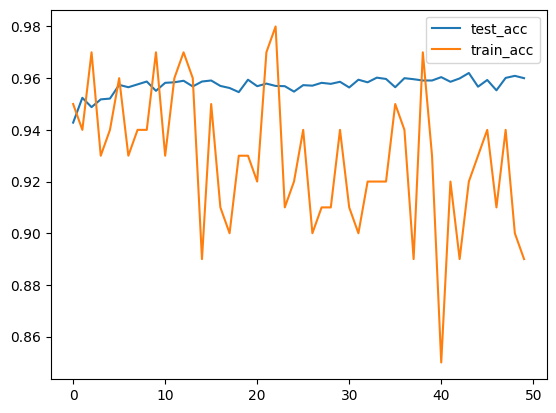

In [ ]:
""" visualization Result """
x_axis = np.arange(args.Iteration)
plt.plot(x_axis, test_acc, label='test_acc')
plt.plot(x_axis, train_acc, label='train_acc')
plt.legend()
plt.show


## Part 2(e)
Train the selected
network on a learned synthetic dataset (with 100 training images), then evaluate it on the
real testing data.

In [ ]:
args.dataset = 'MNIST'
it_eval = 20
args.model = 'ConvNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 19:42:23] Evaluate_10: epoch = 0100 train time = 6 s train loss = 0.409851 train acc = 0.8900, test acc = 0.9608
test with synthetic dataset, accuracy = 0.9608


### gaussian noise version

In [ ]:

args.dataset = 'MNIST'
it_eval = 20
args.model = 'ConvNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 20:26:48] Evaluate_10: epoch = 0100 train time = 7 s train loss = 0.434159 train acc = 0.9100, test acc = 0.9536
test with synthetic dataset, accuracy = 0.9536


# Part 3 Cross_architecture


## AlexNet - real dataset initialization

In [ ]:
args.model = 'AlexNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 20:29:31] Evaluate_10: epoch = 0100 train time = 6 s train loss = 1.743352 train acc = 0.5000, test acc = 0.7333
test with synthetic dataset, accuracy = 0.7333


## AlexNet -  gaussian noise version

In [ ]:
args.dataset = 'MNIST'
it_eval = 10
args.model = 'AlexNet'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)

images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 20:29:16] Evaluate_10: epoch = 0100 train time = 6 s train loss = 1.588322 train acc = 0.4600, test acc = 0.7254
test with synthetic dataset, accuracy = 0.7254


## VGG11 - real dataset initialization

In [ ]:
args.model = 'VGG11'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)
images_train = data_save[0][0].to(args.device)
labels_train = data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 19:42:42] Evaluate_10: epoch = 0100 train time = 6 s train loss = 0.197287 train acc = 0.9900, test acc = 0.9343
test with synthetic dataset, accuracy = 0.9343


## VGG11 - gaussian noise version

In [ ]:
args.model = 'VGG11'
net = utils.get_network(args.model,channel=channel,num_classes=num_classes,im_size=im_size).to(args.device)
images_train = rn_mn_data_save[0][0].to(args.device)
labels_train = rn_mn_data_save[0][1].to(args.device)
dst_train = utils.TensorDataset(images_train, labels_train)
_, acc_train, acc_test = utils.evaluate_synset(it_eval,net,images_train ,labels_train,testloader,args)
print("test with synthetic dataset, accuracy = %.4f"%(acc_test))

[2023-11-23 20:29:01] Evaluate_10: epoch = 0100 train time = 7 s train loss = 0.177433 train acc = 0.9800, test acc = 0.9267
test with synthetic dataset, accuracy = 0.9267
